<a href="https://colab.research.google.com/github/yaseemarusiru/Image_Processing_and_Machine_Vision/blob/main/EN3160_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

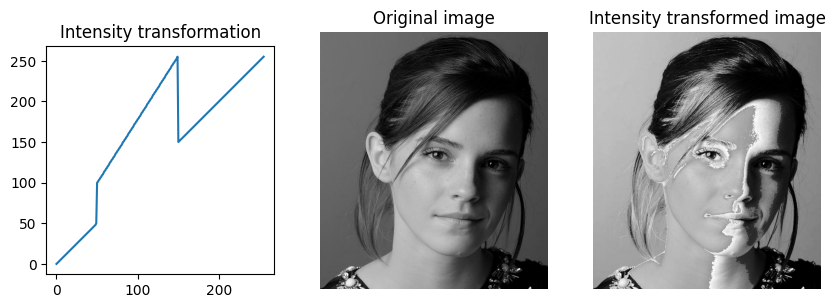

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

gray_image = cv.imread("a1images/emma.jpg",cv.IMREAD_GRAYSCALE)
assert gray_image is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)
transformation = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
assert len(t)==256
g = cv.LUT(gray_image,transformation)

fig, ax = plt.subplots(1,3,figsize=(10,10))

ax[0].plot(t)
ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')

ax[1].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed image")
plt.show()

Question 2

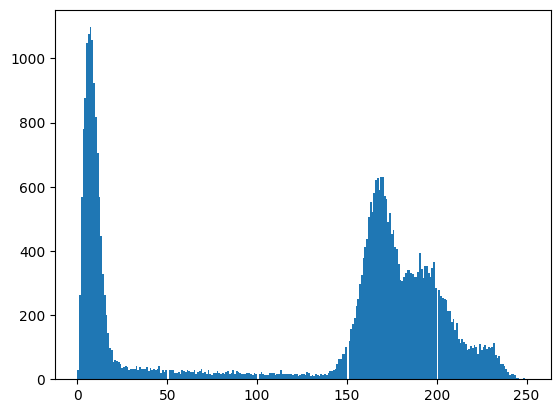

In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain_image = cv.imread("a1images/brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert brain_image is not None

plt.hist(brain_image.ravel(), bins=256);

Second peak seem to be in the range 75 - 185. Third peak seem to be in the range 190 and above. So we will enhance those ranges to get greay and white matter.

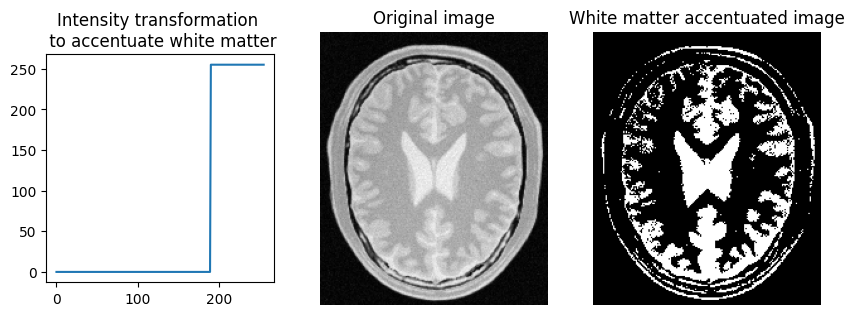

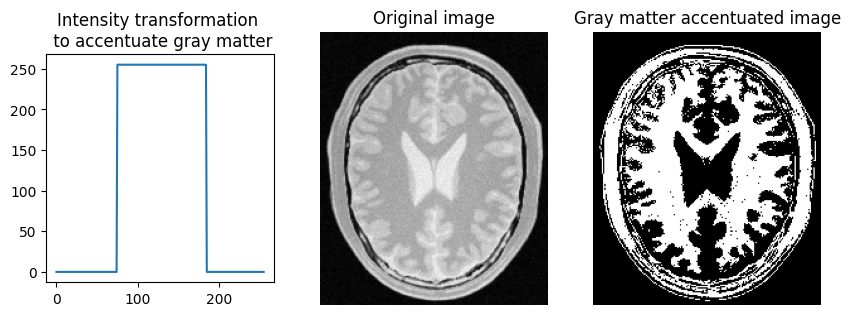

In [41]:
t1_1 = np.zeros(190)
t2_1 = 255*np.ones(66)
t3_1 = np.zeros(0)
transformation_1 = np.concatenate((t1_1,t2_1,t3_1),axis=0).astype(np.uint8)
assert len(transformation_1)==256

t1_2 = np.zeros(75)
t2_2 = 255*np.ones(110)
t3_2 = np.zeros(71)
transformation_2 = np.concatenate((t1_2,t2_2,t3_2),axis=0).astype(np.uint8)
assert len(transformation_2)==256

white_matter = cv.LUT(brain_image,transformation_1)
grey_matter = cv.LUT(brain_image,transformation_2)

fig1, ax1 = plt.subplots(1,3,figsize=(10,10))
ax1[0].plot(transformation_1)
ax1[0].set_aspect('equal')
ax1[0].set_title("Intensity transformation \n to accentuate white matter")

ax1[1].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax1[1].axis('off')
ax1[1].set_title("Original image")

ax1[2].imshow(cv.cvtColor(white_matter,cv.COLOR_BGR2RGB))
ax1[2].axis('off')
ax1[2].set_title("White matter accentuated image")

fig2, ax2 = plt.subplots(1,3,figsize=(10,10))
ax2[0].plot(transformation_2)
ax2[0].set_aspect('equal')
ax2[0].set_title("Intensity transformation \n to accentuate gray matter")

ax2[1].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax2[1].axis('off')
ax2[1].set_title("Original image")

ax2[2].imshow(cv.cvtColor(grey_matter,cv.COLOR_BGR2RGB))
ax2[2].axis('off')
ax2[2].set_title("Gray matter accentuated image")
plt.show()

Question 3

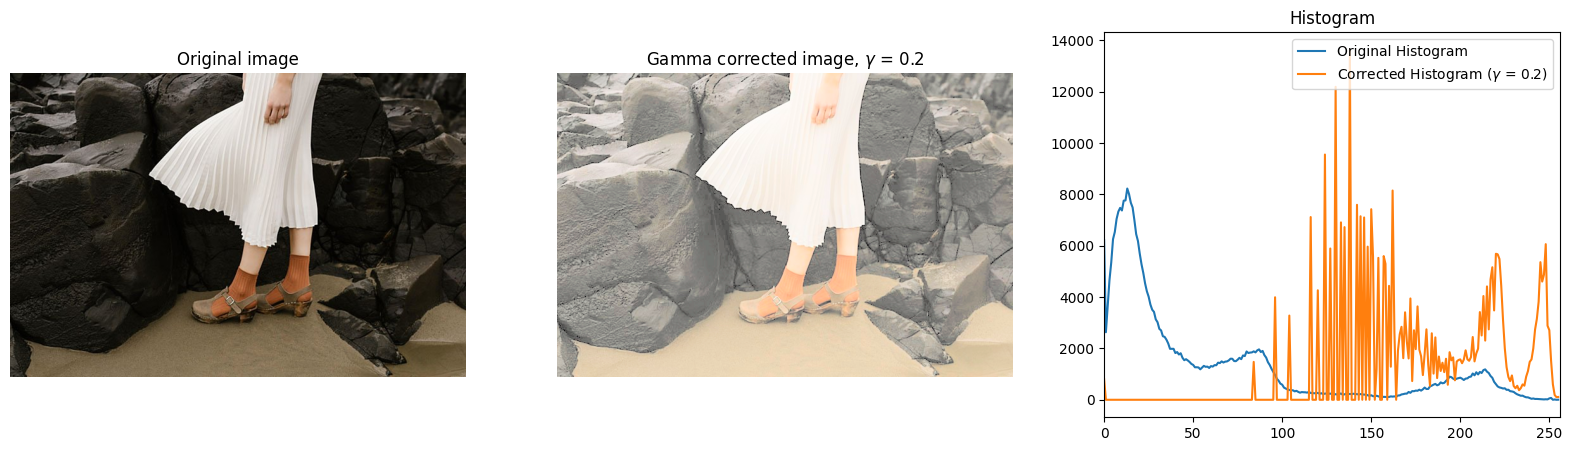

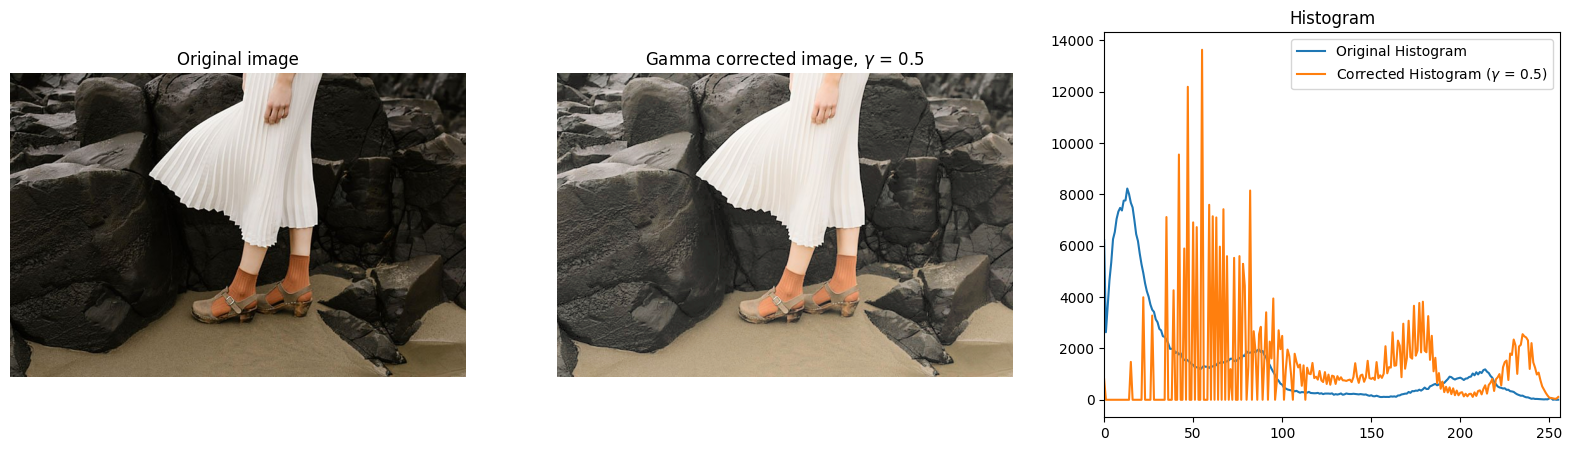

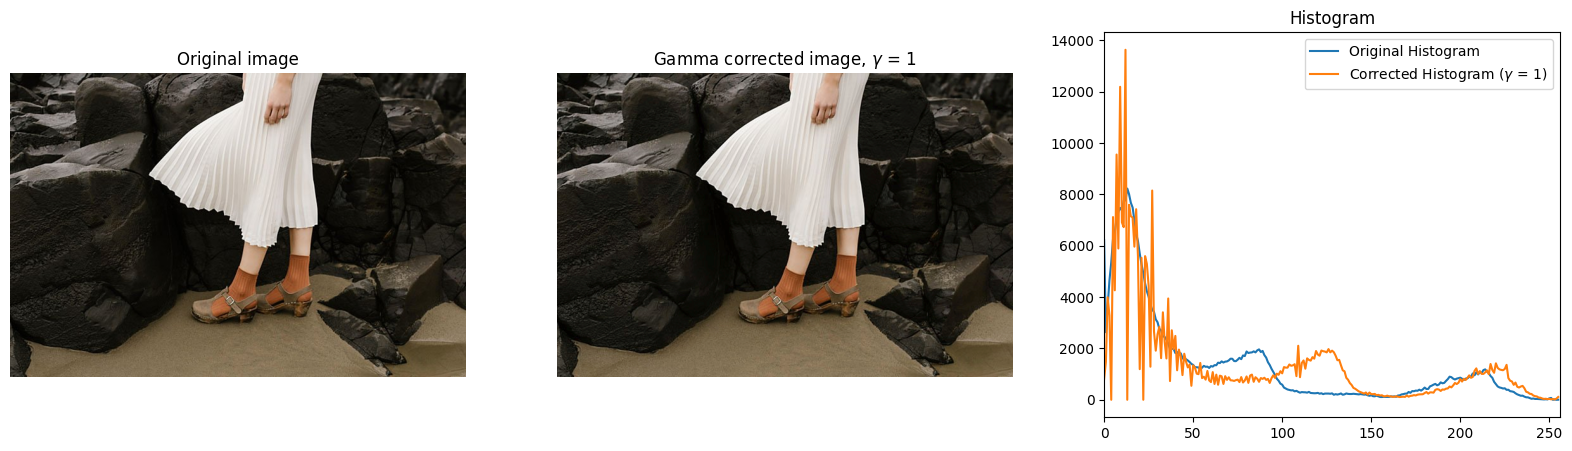

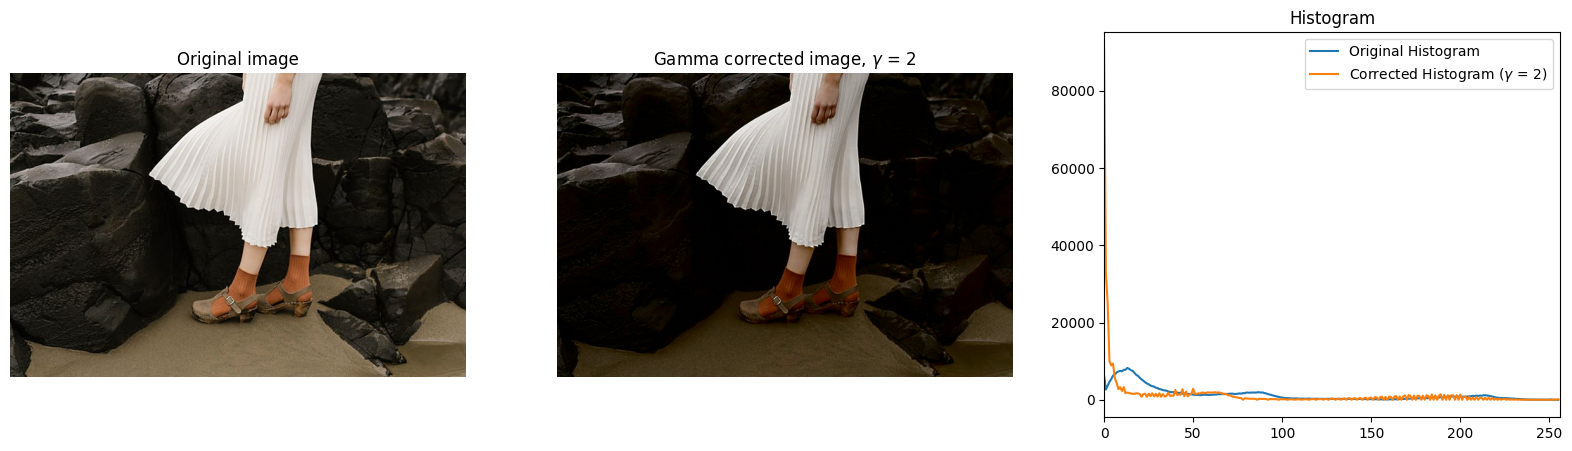

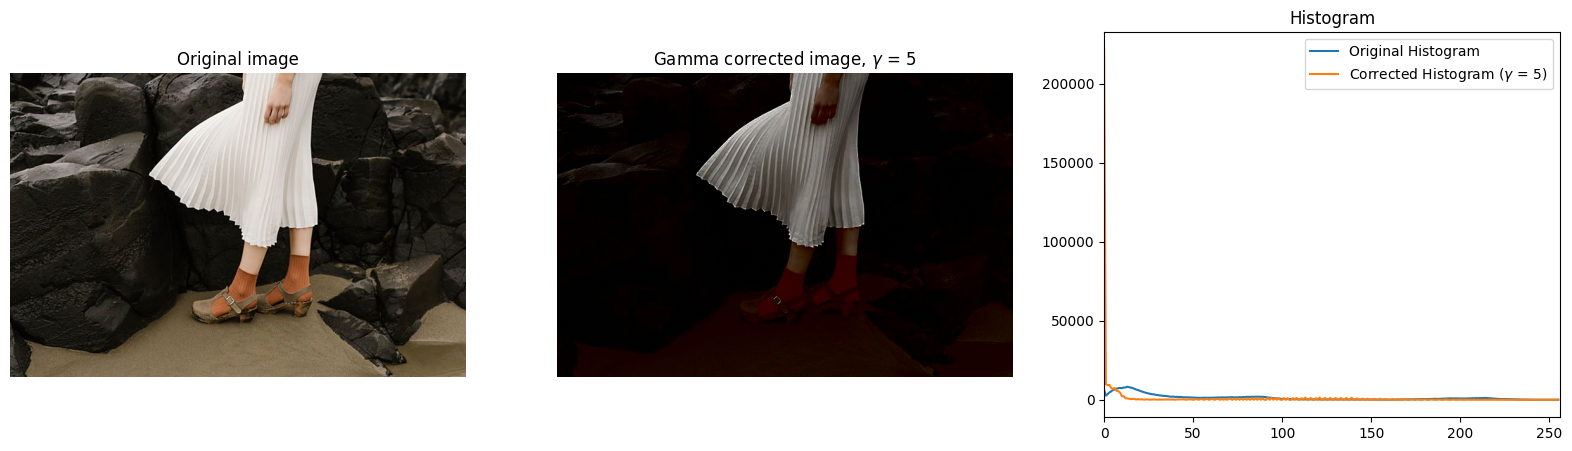

In [70]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

gamma = [0.2, 0.5, 1, 2, 5]

f = cv.imread("a1images/highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(f, cv.COLOR_BGR2LAB))

for g in gamma:
    t = np.array([(i/255.0)**(g)*255 for i in np.arange(0,256)]).astype(np.uint8)
    corrected = cv.LUT(L, t)

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
    ax[0].set_title('Original image')
    ax[0].axis('off')

    ax[1].imshow(cv.cvtColor(cv.merge([corrected, a, b]),cv.COLOR_LAB2RGB))
    ax[1].set_title('Gamma corrected image, $\\gamma$ = {}'.format(g))
    ax[1].axis('off')

    ax[2].plot(cv.calcHist([f],[0],None,[256],[0,256]), label='Original Histogram')
    ax[2].plot(cv.calcHist([cv.merge([corrected, a, b])],[0],None,[256],[0,256]) , label=f'Corrected Histogram ($\\gamma$ = {g})')
    ax[2].set_xlim([0, 256])
    ax[2].set_title('Histogram')
    ax[2].legend()
    plt.show()

When gamma value is less than 1, brightness of the image increases for lesser gamma. When gamma value is greater than 1, brightness of the image decreases with increasing gamma. We can see this in histogram too. When darkness increases, histogram of the gamma corrected image moves to the left.

Question 4